In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Database Setup
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

### Precipitation Analysis

In [13]:
# Retrieve the last 12 months of precipitation data and plot the results
# one_yr_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Retrieve values of last one year data point in the database using SQLAchemy ORM
one_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).order_by(Measurement.date.desc()).all()

for value in one_year:
    print(value.date, value.prcp,)
   

2017-08-23 0.0
2017-08-23 0.0
2017-08-23 0.08
2017-08-23 0.45
2017-08-22 0.0
2017-08-22 0.0
2017-08-22 0.5
2017-08-21 0.0
2017-08-21 0.02
2017-08-21 None
2017-08-21 0.56
2017-08-20 0.0
2017-08-20 0.01
2017-08-20 None
2017-08-19 0.0
2017-08-19 0.0
2017-08-19 None
2017-08-19 0.09
2017-08-18 0.0
2017-08-18 0.0
2017-08-18 0.06
2017-08-18 None
2017-08-17 0.0
2017-08-17 0.05
2017-08-17 0.01
2017-08-17 0.13
2017-08-16 0.0
2017-08-16 0.07
2017-08-16 0.12
2017-08-16 0.42
2017-08-15 0.02
2017-08-15 0.0
2017-08-15 0.06
2017-08-15 0.32
2017-08-15 0.42
2017-08-14 0.0
2017-08-14 0.01
2017-08-14 0.08
2017-08-14 0.0
2017-08-14 0.22
2017-08-13 0.0
2017-08-13 None
2017-08-13 0.0
2017-08-13 0.0
2017-08-13 None
2017-08-12 0.0
2017-08-12 0.0
2017-08-12 0.14
2017-08-11 0.0
2017-08-11 0.0
2017-08-11 0.0
2017-08-11 None
2017-08-10 0.0
2017-08-10 0.0
2017-08-10 0.0
2017-08-10 0.07
2017-08-09 0.0
2017-08-09 0.0
2017-08-09 0.15
2017-08-08 0.0
2017-08-08 0.1
2017-08-08 0.0
2017-08-08 0.34
2017-08-07 0.0
2017-08-0

2016-12-01 0.16
2016-12-01 0.37
2016-12-01 0.72
2016-11-30 0.14
2016-11-30 0.05
2016-11-30 0.03
2016-11-30 None
2016-11-30 0.0
2016-11-30 0.05
2016-11-30 0.79
2016-11-29 0.0
2016-11-29 0.04
2016-11-29 0.04
2016-11-29 None
2016-11-29 0.06
2016-11-29 0.09
2016-11-29 0.2
2016-11-28 0.01
2016-11-28 0.02
2016-11-28 0.0
2016-11-28 None
2016-11-28 0.0
2016-11-28 0.0
2016-11-28 0.69
2016-11-27 0.0
2016-11-27 0.06
2016-11-27 0.03
2016-11-27 0.0
2016-11-27 0.17
2016-11-27 0.29
2016-11-26 0.05
2016-11-26 0.05
2016-11-26 0.02
2016-11-26 0.03
2016-11-26 0.06
2016-11-26 0.3
2016-11-25 0.05
2016-11-25 0.05
2016-11-25 None
2016-11-25 0.11
2016-11-25 0.08
2016-11-25 1.03
2016-11-24 0.05
2016-11-24 0.2
2016-11-24 0.21
2016-11-24 0.3
2016-11-24 0.72
2016-11-23 0.14
2016-11-23 0.03
2016-11-23 None
2016-11-23 0.03
2016-11-23 0.25
2016-11-23 0.22
2016-11-22 0.13
2016-11-22 0.41
2016-11-22 None
2016-11-22 None
2016-11-22 0.31
2016-11-22 2.05
2016-11-22 2.11
2016-11-21 0.01
2016-11-21 0.02
2016-11-21 None
201

In [14]:
# Other way to abstract value into dictionary of list
# prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Retrieve values of last one year data point in the database using SQLAchemy ORM
# one_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).order_by(Measurement.date.desc()).all()

# year_date = []
# for date, prcp in one_year:
#     date_dict = {}
#     date_dict['date'] = date
#     date_dict['prcp']= prcp
#     year_date.append(date_dict)

#     print(year_date)

In [15]:
# Organize last one year data point values into Panda DataFrame
df = pd.DataFrame(one_year[:2230], columns=['Date', 'Precipitation'])

# Set the index to the date column to "Date"
df.set_index('Date', inplace=True )

# Sort the dataframe by date
result = df.sort_values(by='Date', ascending=True)


result.head()

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN


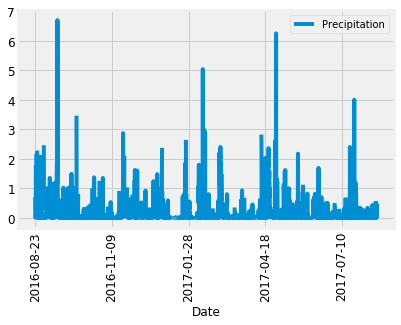

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
# ax = df.iloc[:20:-1].plot(kind='bar', title ='Precipitation', figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("Date", fontsize=12)
# ax.set_ylabel("Precipitation", fontsize=12)
# plt.show()


# Pandas Ploting using style.use to shortcut the plotting 
result.plot(rot=90, fontsize =12)


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [18]:
# Retrieve a query to show how many stations are in the database using SQLAchemy ORM
stations = session.query(Station.id).count()

print(f'There are {stations} stations in the weather station dataset.')

There are 9 stations in the weather station dataset.


In [19]:
# List all 9 active stations,which most active station (station has most rows) 
# on top (descending order) using SQLAchemy ORM 

station_act = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()

station_act

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [20]:
# Other way to retreat the station count
# Retrieve a query to show how many stations are in the database using SQLAchemy ORM
# stations = session.query(Measurement,Station).filter(Measurement.station == Station.station).all()
# station_count =station.count(station.station) 
# station_count = []
# for stn in stations:
#     (mt,st) = stn
#     station_count.append(st.station)
    
# len(set(station_count))

In [21]:
# Retrive actual station by using  "from Collections import Counter". 

# stations = Counter(station_count)
# stations.most_common()

In [22]:
# Take most active station to retrieve the lowest temperature recorded, 
# highest temperature recorded, and average temperature
station_2772 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

station_2772

[(54.0, 85.0, 71.66378066378067)]

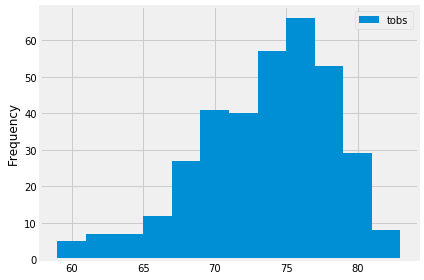

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for the station and plot the results as a histogram
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()


## Bonus Analyses

#### Temperature Analysis II

In [24]:
# Using `calc_temps` to determine start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Calculate the tmin, tavg, and tmax using above function `calc_temps` 
# for your 7 days trip using the previous year's data for those same dates.
prev_year_start = dt.date(2018, 2, 1) - dt.timedelta(days=365)
prev_year_end = dt.date(2018, 2, 7) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

59.0 69.42222222222222 80.0


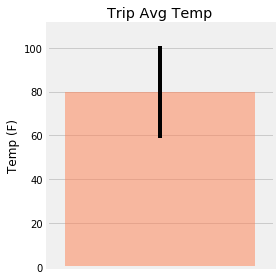

In [26]:
# Plot the results from your previous query as a bar chart. 
# Title= Trip Avg Temp", yValue = Avg temperture, y error bar (yerr) = tmax-tmin as peak-to-peak, 

fig, ax = plt.subplots(figsize=plt.figaspect(1))
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="T", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.1, .1)
# fig.autofmt_xdate()
fig.tight_layout()
# fig.show()

#### Daily Rainfall Average

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2017-01-01'
end_date = '2018-01-01'

sel = [Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
# print(results)

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
trip_start = '2018-02-01'
trip_end = '2018-02-07'
# Set the start and end date of the trip
trip_dates = pd.date_range(trip_start, trip_end, freq='D')
# Use the start and end date to create a range of dates
trip_month_day = trip_dates.strftime('%m-%d')
# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_month_day:
    normals.append(*daily_normals(date))
    
normals

[(56.0, 68.14035087719299, 78.0),
 (59.0, 68.85964912280701, 77.0),
 (58.0, 67.79661016949153, 77.0),
 (61.0, 68.14035087719299, 76.0),
 (59.0, 69.6842105263158, 80.0),
 (58.0, 70.38983050847457, 77.0),
 (60.0, 69.0, 77.0)]

In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
df['date'] = trip_dates
df.set_index(['date'],inplace=True)
df.head()

,tmin,tavg,tmax
date,,,
2018-02-01,56.0,68.140351,78.0
2018-02-02,59.0,68.859649,77.0
2018-02-03,58.0,67.796610,77.0
2018-02-04,61.0,68.140351,76.0
2018-02-05,59.0,69.684211,80.0


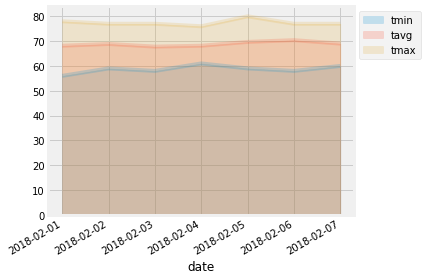

In [31]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind='area', stacked=False, x_compat=True, alpha=.2)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()